# Главные и второстепенные галочки

Для каждой оси сужествуют главные и второстепенные галочки. Главные галочки больше и более заметные, а маленькие галочки меньше. Обычно Maptlotlib редко использует маленькие галочки, но при построении логарифмических графиков используются второстепенные галочки.

In [16]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

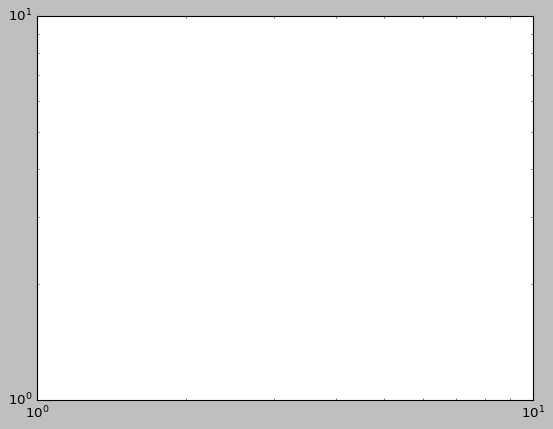

In [17]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

Главные и второстепенные галочки могут быть настроены с помощью объектов `formatter` и `locator`:

In [18]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [21]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

# Сокрытие галочек или меток

Если надо скрыть галочки или метки, то можно использовать `plt.NullLocator()` и `plt.NullFormatter()`:

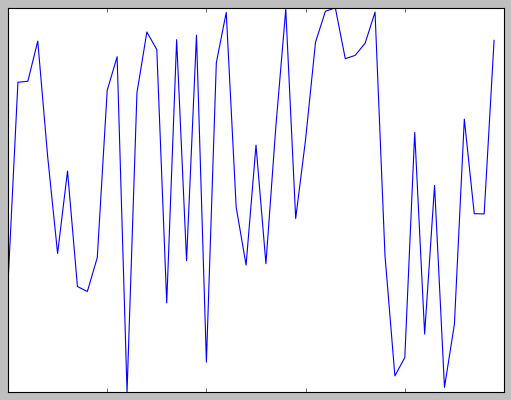

In [22]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Обратите внимание, что мы удалили метки, но оставили галочки на оси `x`, и удалили галочки (в т.ч. также и метки) для оси `y`.
Можно также удалить все галочки:

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/mojo/scikit_learn_data


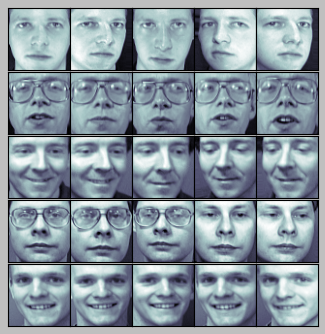

In [23]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

# Уменьшение или увеличение количества галочек

Иногда, по умолчанию, создаётся слишком много меток и галочек:

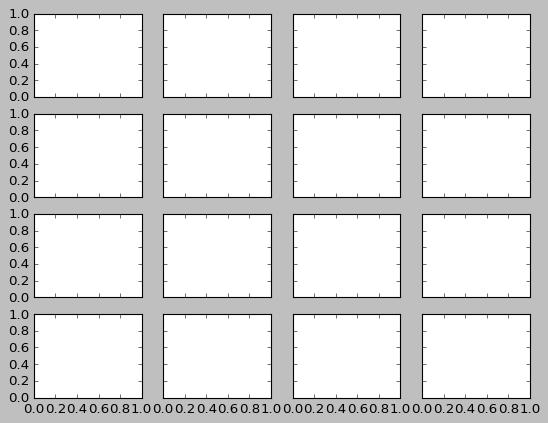

In [24]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Для оси `x` галочки перекрываются и их сложно читать. Мы можем использовать `plt.MaxNLocator()` для исправления этой ситуации, можно указать максимальное число галочек, которое будет показано. Учитывая это максимально допустимое число галочек, Matplotlib сам выберет где показать галочки:

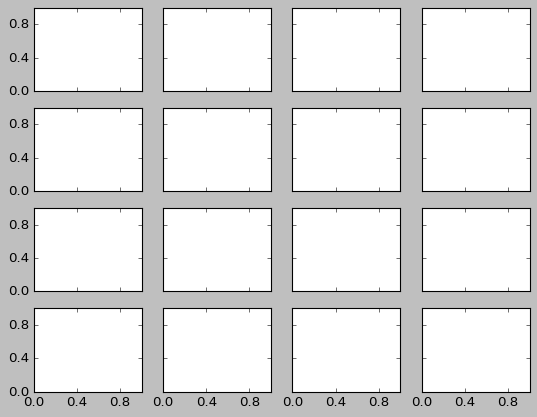

In [25]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

# Необычные виды галочек

Вид галочки по умолчанию может быть неподходящим или неудобным. Например:

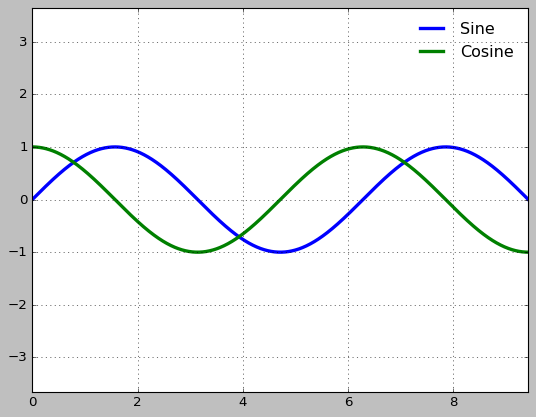

In [26]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

Для вышестоящего изображения есть несколько замечаний по галочкам.

Первое это то, что для тригонометрических функций более правильным является использование галочек как частей числа $\pi$. Мы можем установить это через `MultipleLocator`, которые располагает галочки в множителях числа, которое вы зададите. Например, мы можем использовать множитель $\pi/4$:

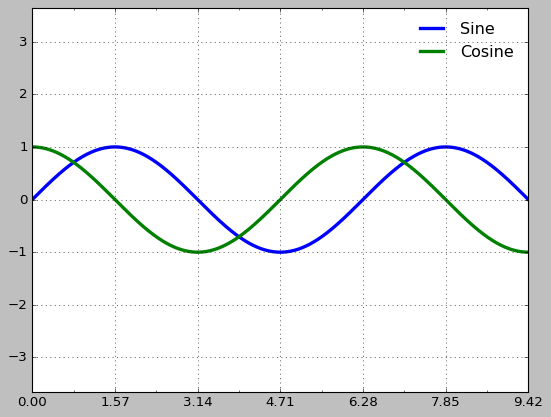

In [27]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

Теперь по оси `x` у нас множители числа $\pi$, но в десятичном формате, что неудобно. Мы можем исправить это с помощью форматтера галочек, но не существует встроенного форматтера для такого случая, поэтому мы будем использовать `plt.FuncFormatter`, который принимает функцию определённую пользователем:

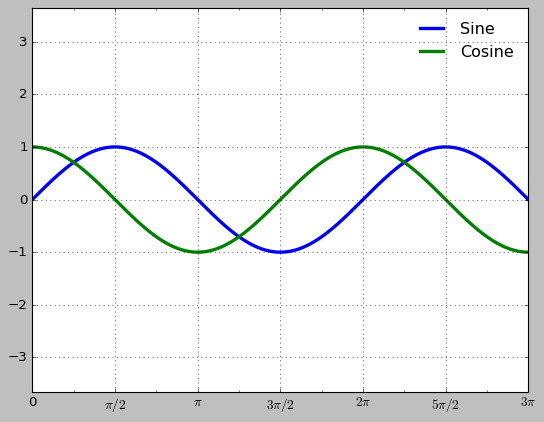

In [28]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

Обратите внимание, что мы использовали формат `LaTeX` для указания значений: `r"$\pi/2$`.